## Визуализация торгов за день
- по реальным записям из базы
- тестовые торговые алгоритмы

07:00 - INIT 
     config - RNFT+ 3/0/2 x l4 x 1.0(+x0.2)¤ |u0.02 d0.0| 
     instrument - RNFT / BBG00F9XX7H4, РуссНефть, rub, round_signs=1, inc=0.1, lot=1, short=True
     cur_used_cnt - 0
     last_price - 0
     depo - 0.0
     instrument_id - 0
     run_instance - None
07:00 - START 
     need_operations - 0
     start_price - 200.7 rub
     max_port - 4816.8 rub
07:00 - Buy order set, 4 x -199.0 | s0 (x4=0) | p 0.0 rub
07:00 - Buy order set, 4 x -197.8 | s0 (x4=0) | p 0.0 rub
07:00 - Sell order set, 4 x 202.0 | s0 (x4=0) | p 0.0 rub
07:00 - Sell order set, 4 x 203.2 | s0 (x4=0) | p 0.0 rub
07:06 - BUY order executed, 4 x 199.0 | s1 (x4=4) | p -2.0 rub
07:06 - Buy order canceled, 4 x 197.8 | s1 (x4=4) | p -2.0 rub
07:06 - Sell order canceled, 4 x 202.0 | s1 (x4=4) | p -2.0 rub
07:06 - Sell order canceled, 4 x 203.2 | s1 (x4=4) | p -2.0 rub
07:06 - Buy order set, 4 x -196.8 | s1 (x4=4) | p -2.0 rub
07:06 - Buy order set, 4 x -195.4 | s1 (x4=4) | p -2.0 rub
07:06 - Sell order set, 

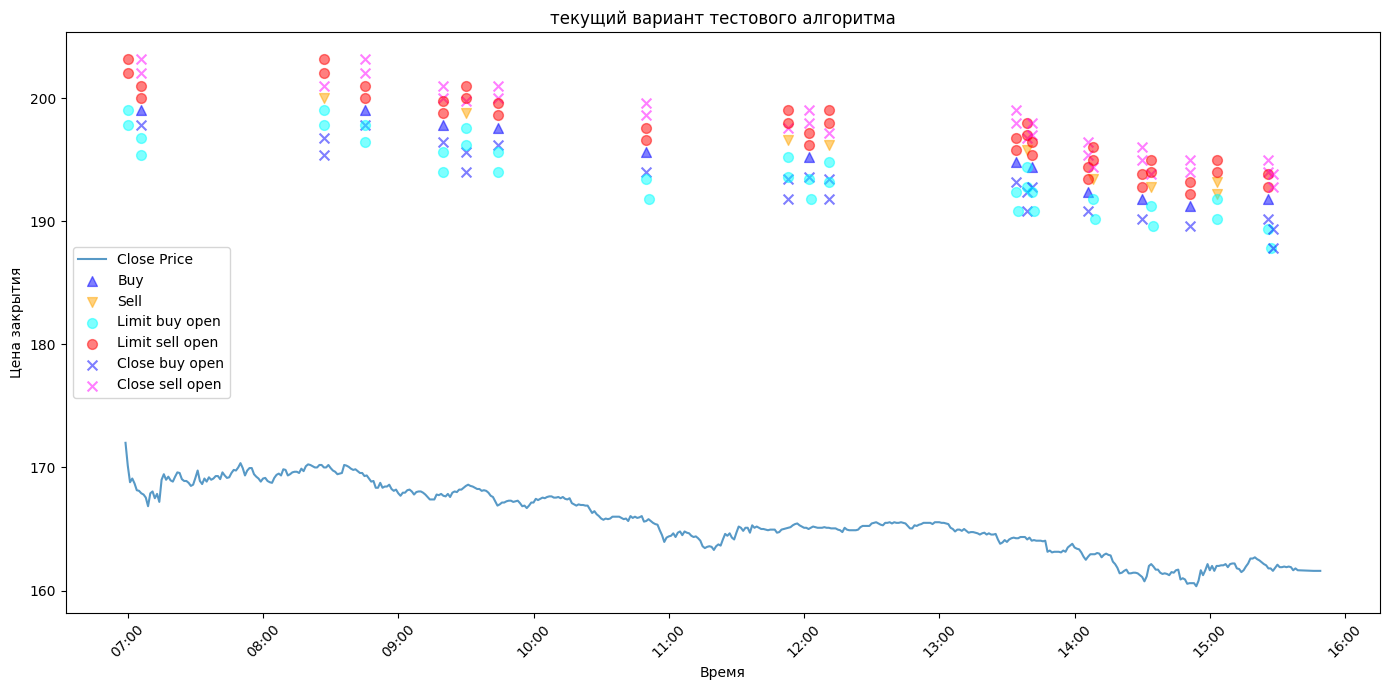

In [1]:
from app.config import RunConfig
from bot import TestAlgorithm
from datetime import datetime
from bot.vis import Visualize
from bot.db import HistoricalTrade, TickerCache
%reload_ext autoreload
%autoreload 2


TICKER = 'EUTR'

historical_trade = HistoricalTrade()
ticker_cache = TickerCache(TICKER)

# плавное падение 2024-04-24, 2024-04-25

date = '2024-06-19'
# date = None

alg_name = '-' #'v5_t60'
# alg_name = None #'v5_t60'

viz = Visualize(ticker_cache)

def show_test_alg(date_):
    if date_ is None:
        date_ = datetime.now().strftime('%Y-%m-%d')
    
    test_alg = TestAlgorithm(
        do_printing=True,
        config=RunConfig.from_repr_string('RNFT+ 3/0:0/2 x l4 x 1.0(+x0.2)¤ |u0.02 d0.0| ')
        # config=RunConfig(
        #     ticker=TICKER,
        #
        #     step_max_cnt=6,
        #     step_base_cnt=3,
        #     pretest_period=5,
        #     pretest_type=RunConfig.PRETEST_PRE,
        #
        #     step_size=1.4,
        #
        #     step_set_orders_cnt=1,
        #     step_lots=1,
        #
        #     stop_up_p=0,
        #     stop_down_p=0,
        #     threshold_sell_steps=0,
        #     threshold_buy_steps=0,
        # ),
    )

    result = test_alg.test(
        last_test_date = date_,
        test_days_num = 1, # тут берем всегда только 1 день для этого файла
        shares_count=0,
    )
    
    print()
    print(f"День: {date_}, 'тестовый', Итог: {result['profit']}"
          # f", Записей: {result['op_cnt']}"
          )
    print(result)

    viz.draw(
        date_, 
        test_alg.accounting_helper.get_deals(),
        test_alg.accounting_helper.get_orders(),
        'текущий вариант тестового алгоритма'
    )

results = historical_trade.get_daily_totals(date, alg_name)



for obj in results:
    print(f"День: {obj.date}, {obj.alg_name}, "
          f"{'Итог' if obj.is_closed else 'Подытог'}: {obj.total}, "
          f"Записей: {obj.cnt}")
    viz.draw(
        obj.date, 
        historical_trade.get_deals(obj.date, obj.alg_name, TICKER),
        [],
        obj.alg_name
    )

show_test_alg(date)


{'profit': 24.75, 'profit_p': 0.5, 'config': EUTR+ 3/pre3:-3/3 x l4 x 1.0¤ |u0.02 d0.0| , 'op': 15}


{'profit': 44.15, 'profit_p': 0.89, 'config': EUTR+ 3/pre3:-3/3 x l4 x 1.0¤ |u0.02 d0.0| , 'op': 19}
